## Ujian Modul 2
Nama    : Sapto Aji Pamungkas
Kelas   : Job Connector Data Science Batch 7

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('tsa_claims_ujian.csv')

In [3]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
df.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
dfDesc=[]
for i in df.columns:
    dfDesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((((df[i].isna().sum())/(len(df)))*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(2).values])
pd.DataFrame(dfDesc, columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2008080548056, 2015110526570]"
1,Date Received,object,70,0.14,3522,"[4-Mar-14, 8-Feb-08]"
2,Incident Date,object,570,1.12,10788,"[9/18/2005 0:00, 9/21/2010 8:14]"
3,Airport Code,object,2052,4.02,405,"[PGA, RKS]"
4,Airport Name,object,2052,4.02,419,"[Southeast Texas Regional, Riverton Regional]"
5,Airline Name,object,8555,16.75,243,"[Avianca, Air Aruba]"
6,Claim Type,object,1960,3.84,8,"[Personal Injury, nan]"
7,Claim Site,object,190,0.37,6,"[Motor Vehicle, -]"
8,Item,object,1012,1.98,1854,[Game Equipment (poker chips; checker sets; ch...
9,Claim Amount,object,992,1.94,13248,"[$113.35 , $394.15 ]"


If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan)

In [8]:
for i in range (len(df.columns)):
    for j in range (len(df[df.columns[i]])):
        if df[df.columns[i]][j] == '-':
            df[df.columns[i]][j] = np.nan
df.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN


Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.

In [9]:
c=[]
for i in range(len(df['Incident Date'])):
    if len(str(df['Incident Date'][i])) == 17:
        c.append(i)
dferror = df.iloc[c]
dferror

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,24-Jan-05,17-MAY-0200 00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,23-Feb-05,17-FEB-0205 00:00,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,23-Mar-05,07-MAR-0005 00:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,29-Mar-05,04-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,30-Mar-05,18-MAR-0200 00:00,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,12-Apr-05,12-MAR-0205 00:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,17-May-05,01-MAY-0205 00:00,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,8-Jul-05,01-JUL-0200 00:00,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,1-Aug-05,01-MAY-0205 00:00,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,8-Dec-05,20-NOV-0205 00:00,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


In [10]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [11]:
df.dropna()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
14,18908,9-Oct-02,9/9/2002 0:00,RDU,Raleigh-Durham International,Continental Airlines,Property Damage,Checkpoint,Other,$342.36,Approved,$237.00,Approve in Full
17,21052,17-Oct-02,9/22/2002 0:00,MCO,Orlando International Airport,Virgin Atlantic,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),$60.00,Approved,$60.00,Approve in Full
21,18614,17-Oct-02,9/14/2002 0:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,$2;000.00,Settled,$600.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36243,2010010667221,30-Dec-09,12/1/2009 16:40,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,$80.00,Settled,$72.00,Settle
36244,2010010867347,30-Dec-09,11/2/2009 0:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,$546.95,Settled,$514.73,Settle
36245,2010010867360,30-Dec-09,12/14/2009 8:30,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,$185.00,Settled,$179.23,Settle
36246,2010010667197,31-Dec-09,12/10/2009 12:40,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$70.00,Approved,$70.00,Approve in Full


In [12]:
df['Date Received'] = pd.to_datetime(df['Date Received'])

In [13]:
z=[]
for i in range(len(df['Incident Date'])):
    if len(str(df['Incident Date'][i])) == 17:
        z.append(i)
month = {'Jan':'1', 'Feb':'2', 'Mar':'3', 'Apr':'4', 'May':'5', 'Jun':'6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11', 'Dec':'12'}

for i in z:
    x = str(df['Incident Date'][i])
    y = str(df['Date Received'][i].year)
    for j,k in month.items():
        if x[3:6] == j.upper():
            a = str(y+'/'+month[j]+'/'+x[:2])
            df.at[i,'Incident Date']=a
df['Incident Date']=pd.to_datetime(df['Incident Date'])

In [14]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [17]:
dfcekerror = df.iloc[c]
dfcekerror

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [18]:
df['Day Differences'] = (df['Date Received']-df['Incident Date']).dt.days
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,42.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0


Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

In [19]:
df = df.dropna()
df.reset_index(drop=True)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
1,16759,2002-08-21,2002-07-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,40.0
2,18908,2002-10-09,2002-09-09 00:00:00,RDU,Raleigh-Durham International,Continental Airlines,Property Damage,Checkpoint,Other,$342.36,Approved,$237.00,Approve in Full,30.0
3,21052,2002-10-17,2002-09-22 00:00:00,MCO,Orlando International Airport,Virgin Atlantic,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),$60.00,Approved,$60.00,Approve in Full,25.0
4,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,$2;000.00,Settled,$600.00,Settle,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23734,2010010667221,2009-12-30,2009-12-01 16:40:00,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,$80.00,Settled,$72.00,Settle,28.0
23735,2010010867347,2009-12-30,2009-11-02 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,$546.95,Settled,$514.73,Settle,58.0
23736,2010010867360,2009-12-30,2009-12-14 08:30:00,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,$185.00,Settled,$179.23,Settle,15.0
23737,2010010667197,2009-12-31,2009-12-10 12:40:00,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$70.00,Approved,$70.00,Approve in Full,20.0


Text(0.5, 1.0, 'Day Differences Distribution')

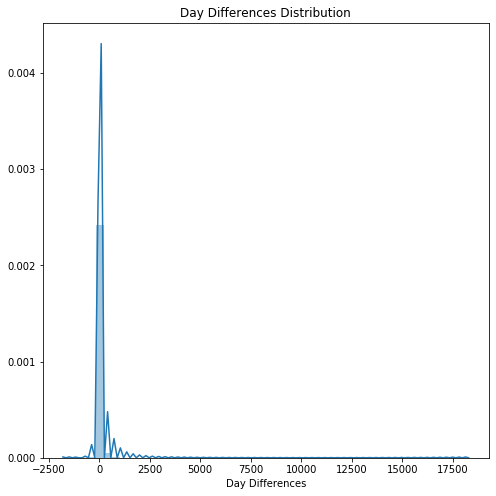

In [20]:
plt.figure(figsize = (8,8))
sns.distplot(df['Day Differences'])
plt.title('Day Differences Distribution')

In [21]:
df[df['Day Differences']>100]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
131,0912801M,2002-12-06,2002-08-06 00:00:00,JFK,John F. Kennedy International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$200.00,Settled,$50.00,Settle,122.0
136,19214,2002-12-09,2002-08-13 00:00:00,LGA,LaGuardia,UAL,Passenger Property Loss,Checkpoint,Other,$1;100.00,Settled,$1;046.42,Settle,118.0
163,0715526M,2002-12-13,2002-08-14 00:00:00,BOS,Boston (Logan) International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$1;800.00,Denied,$0.00,Deny,121.0
167,17705,2002-12-13,2002-09-02 00:00:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$174.49,Settled,$113.42,Settle,102.0
251,19297,2002-12-30,2002-09-08 00:00:00,JFK,John F. Kennedy International,Delta Air Lines,Passenger Property Loss,Checkpoint,Stereo Items & Accessories,$120.01,Denied,$0.00,Deny,113.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36060,2010010667220,2009-12-08,2009-07-04 07:00:00,BOS,Boston (Logan) International Airport,American Airlines,Passenger Property Loss,Checkpoint,Toys (game systems; cartridges; radio controll...,$325.00,Settled,$287.94,Settle,156.0
36083,2009121666569,2009-12-10,2009-07-07 12:00:00,MSY,New Orleans International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,155.0
36171,2009123066955,2009-12-23,2009-09-12 10:40:00,JFK,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Electrical and Gas Appliances Minor - $200 or ...,$273.60,Denied,$0.00,Deny,101.0
36195,2009123166996,2009-12-28,2008-08-09 00:00:00,BOS,Boston (Logan) International Airport,Jet Blue,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$27.69,Denied,$0.00,Deny,506.0


Text(0.5, 1.0, 'Day Differences Distribution Less Than 0')

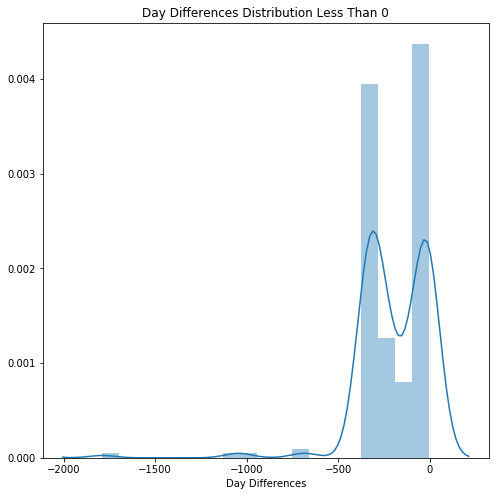

In [22]:
plt.figure(figsize = (8,8))
sns.distplot(df['Day Differences'][df['Day Differences']<0])
plt.title('Day Differences Distribution Less Than 0')

Text(0.5, 1.0, 'Day Differences Distribution Over Than 1000')

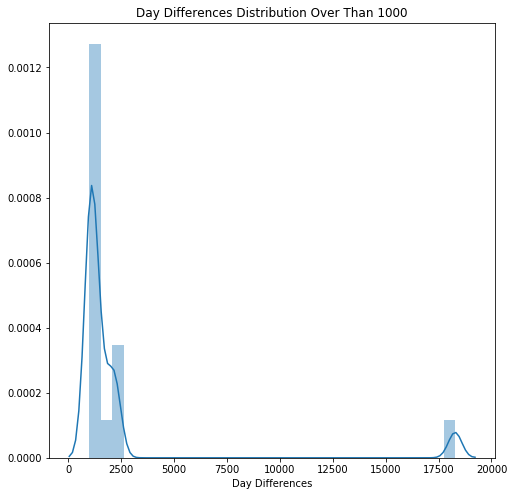

In [23]:
plt.figure(figsize = (8,8))
sns.distplot(df['Day Differences'][df['Day Differences']>1000])
plt.title('Day Differences Distribution Over Than 1000')

## Question
Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

Thousand Differences - 

Less than 0 - 

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [24]:
df['Claim Amount'] = df['Claim Amount'].str.replace('$', '').str.replace(' ', '').str.replace(';', '').str.replace(',', '.')
df['Claim Amount'] = df['Claim Amount'].astype(float)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
df['Close Amount'] = df['Close Amount'].str.replace('$', '').str.replace(' ', '').str.replace(';', '').str.replace(',', '.')
df['Close Amount'] = df['Close Amount'].astype(float)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [26]:
df['Amount Differences'] = df['Claim Amount'] - df['Close Amount']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0,0.00
3,16759,2002-08-21,2002-07-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40.0,0.44
14,18908,2002-10-09,2002-09-09 00:00:00,RDU,Raleigh-Durham International,Continental Airlines,Property Damage,Checkpoint,Other,342.36,Approved,237.00,Approve in Full,30.0,105.36
17,21052,2002-10-17,2002-09-22 00:00:00,MCO,Orlando International Airport,Virgin Atlantic,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),60.00,Approved,60.00,Approve in Full,25.0,0.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36243,2010010667221,2009-12-30,2009-12-01 16:40:00,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settled,72.00,Settle,28.0,8.00
36244,2010010867347,2009-12-30,2009-11-02 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,546.95,Settled,514.73,Settle,58.0,32.22
36245,2010010867360,2009-12-30,2009-12-14 08:30:00,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,185.00,Settled,179.23,Settle,15.0,5.77
36246,2010010667197,2009-12-31,2009-12-10 12:40:00,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,70.00,Approved,70.00,Approve in Full,20.0,0.00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23739 entries, 0 to 36248
Data columns (total 15 columns):
Claim Number          23739 non-null object
Date Received         23739 non-null datetime64[ns]
Incident Date         23739 non-null datetime64[ns]
Airport Code          23739 non-null object
Airport Name          23739 non-null object
Airline Name          23739 non-null object
Claim Type            23739 non-null object
Claim Site            23739 non-null object
Item                  23739 non-null object
Claim Amount          23739 non-null float64
Status                23739 non-null object
Close Amount          23739 non-null float64
Disposition           23739 non-null object
Day Differences       23739 non-null float64
Amount Differences    23739 non-null float64
dtypes: datetime64[ns](2), float64(4), object(9)
memory usage: 2.9+ MB


Text(0.5, 1.0, 'Amount Differences')

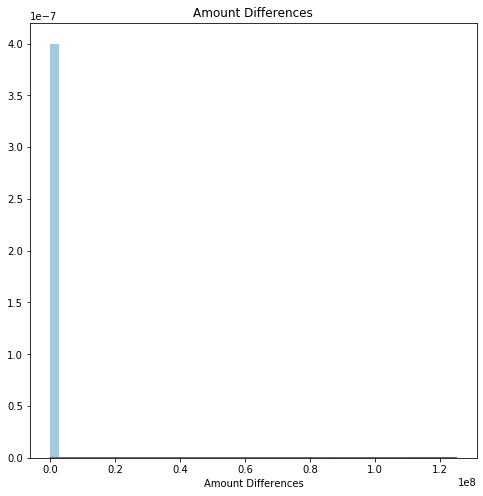

In [65]:
plt.figure(figsize = (8,8))
sns.distplot(df['Amount Differences'])
plt.title('Amount Differences')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [30]:
df['Amount Differences'].describe()

count    2.373900e+04
mean     6.147379e+03
std      8.115252e+05
min     -4.311000e+02
25%      5.020000e+00
50%      1.018800e+02
75%      3.744900e+02
max      1.250000e+08
Name: Amount Differences, dtype: float64

In [31]:
Q1 = np.percentile(df['Amount Differences'],25)
Q3 = np.percentile(df['Amount Differences'],75)
IQR = Q3 - Q1
Outlier = Q3 + (1.5* IQR)
dfout = df[df['Amount Differences']>Outlier]
dfout

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,1400.00
150,2004070158217,2002-12-11,2002-09-25 00:00:00,PHX,Phoenix Sky Harbor International,America West,Passenger Theft,Checkpoint,Jewelry - Fine,5800.00,Denied,0.00,Deny,77.0,5800.00
163,0715526M,2002-12-13,2002-08-14 00:00:00,BOS,Boston (Logan) International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,1800.00,Denied,0.00,Deny,121.0,1800.00
183,21871,2002-12-16,2002-12-01 00:00:00,MCO,Orlando International Airport,Southwest Airlines,Property Damage,Checkpoint,Other,1933.14,Settled,962.15,Settle,15.0,970.99
267,0617706L,2003-01-02,2002-12-06 00:00:00,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Other,Luggage (all types including footlockers),2720.00,Settled,1350.00,Settle,27.0,1370.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36160,2009123066971,2009-12-22,2009-11-25 07:30:00,LAX,Los Angeles International Airport,Allegiant Air,Passenger Property Loss,Checked Baggage,Computer - Laptop,2500.00,Denied,0.00,Deny,26.0,2500.00
36180,2010010467058,2009-12-24,2009-11-16 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Books - Fiction; paperbacks; magazines; etc.; ...,6500.00,Denied,0.00,Deny,38.0,6500.00
36192,2009123066934,2009-12-28,2009-12-17 00:00:00,LAX,Los Angeles International Airport,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,11275.52,Denied,0.00,Deny,11.0,11275.52
36207,2009123167007,2009-12-29,2009-12-19 11:00:00,SAN,San Diego International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop; Jewelry - Fine,2369.00,Denied,0.00,Deny,9.0,2369.00


In [63]:
dfin = df[df['Amount Differences']<Outlier]
dfin

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences,Out
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0,0.00,Not Outlier
1,16759,2002-08-21,2002-07-12 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.00,Approve in Full,40.0,0.44,Not Outlier
2,18908,2002-10-09,2002-09-09 00:00:00,RDU,Raleigh-Durham International,Continental Airlines,Property Damage,Checkpoint,Other,342.36,Approved,237.00,Approve in Full,30.0,105.36,Not Outlier
3,21052,2002-10-17,2002-09-22 00:00:00,MCO,Orlando International Airport,Virgin Atlantic,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),60.00,Approved,60.00,Approve in Full,25.0,0.00,Not Outlier
5,20930,2002-10-25,2002-10-02 00:00:00,JFK,John F. Kennedy International,Jet Blue,Passenger Property Loss,Checkpoint,Jewelry - Fine,120.00,Approved,120.00,Approve in Full,23.0,0.00,Not Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23734,2010010667221,2009-12-30,2009-12-01 16:40:00,AUS,Austin-Bergstrom International Airport,Alaska Airlines,Property Damage,Checked Baggage,Medical Equipment & Insturments,80.00,Settled,72.00,Settle,28.0,8.00,Not Outlier
23735,2010010867347,2009-12-30,2009-11-02 00:00:00,ORD,Chicago O'Hare International Airport,UAL,Passenger Property Loss,Checked Baggage,DVD/CD Players; Handbags & Purses (leather or ...,546.95,Settled,514.73,Settle,58.0,32.22,Not Outlier
23736,2010010867360,2009-12-30,2009-12-14 08:30:00,SJU,Luis Munoz Marin International,American Airlines,Property Damage,Checked Baggage,Alcoholic beverages; Cosmetics - Perfume; toil...,185.00,Settled,179.23,Settle,15.0,5.77,Not Outlier
23737,2010010667197,2009-12-31,2009-12-10 12:40:00,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,70.00,Approved,70.00,Approve in Full,20.0,0.00,Not Outlier


In [32]:
dfout['Claim Amount'].describe()

count    2.887000e+03
mean     4.948478e+04
std      2.326967e+06
min      9.292500e+02
25%      1.283465e+03
50%      1.885000e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [33]:
dfout['Close Amount'].describe()

count     2887.000000
mean        93.564832
std        588.263339
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

In [64]:
df['Claim Amount'].describe()

count    2.373900e+04
mean     6.244123e+03
std      8.115263e+05
min      0.000000e+00
25%      6.500000e+01
50%      1.834900e+02
75%      4.832350e+02
max      1.250000e+08
Name: Claim Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question¶
I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data

In [39]:
df=df.reset_index(drop=True)

In [40]:
x = []
for i in range (len(df['Amount Differences'])):
    if (df['Amount Differences'][i]) > Outlier :
        x.append ('Outlier')
    elif df['Amount Differences'][i] <= Outlier  :
        x.append ('Not Outlier')

df['Out'] = x

In [70]:
df['Status'].unique()

array(['Approved', 'Settled', 'Denied', 'Canceled'], dtype=object)

In [74]:
df.groupby(['Out','Status']).count()

Claim Number  Date Received  Incident Date  \
Out         Status                                                 
Not Outlier Approved          5748           5748           5748   
            Canceled             3              3              3   
            Denied           10765          10765          10765   
            Settled           4336           4336           4336   
Outlier     Approved             1              1              1   
            Denied            2622           2622           2622   
            Settled            264            264            264   

                      Airport Code  Airport Name  Airline Name  Claim Type  \
Out         Status                                                           
Not Outlier Approved          5748          5748          5748        5748   
            Canceled             3             3             3           3   
            Denied           10765         10765         10765       10765   
            Settled           4336          4336          4336        4336   
Outlier     Approved             1             1             1           1   
            Denied            2622          2622          2622        2622   
            Settled            264           264           264         264   

                      Claim Site   Item  Claim Amount  Close Amount  \
Out         Status                                                    
Not Outlier Approved        5748   5748          5748          5748   
            Canceled           3      3             3             3   
            Denied         10765  10765         10765         10765   
            Settled         4336   4336          4336          4336   
Outlier     Approved           1      1             1             1   
            Denied          2622   2622          2622          2622   
            Settled          264    264           264           264   

                      Disposition  Day Differences  Amount Differences  
Out         Status                                                      
Not Outlier Approved         5748             5748                5748  
            Canceled            3                3                   3  
            Denied          10765            10765               10765  
            Settled          4336             4336                4336  
Outlier     Approved            1                1                   1  
            Denied           2622             2622                2622  
            Settled           264              264                 264

In [61]:
fig2 = px.histogram(df, x= 'Amount Differences', facet_col = 'Out',color='Out',histfunc='sum', title="Outlier VS Non Outlier Amount Differences")
fig2.show()

In [41]:
z=[]
def normal_tes (data,col, sub):
    print ('QQ Plot')
    import statsmodels.api as sm
    import pylab
    x=data[col].unique()
    for i in range (len(x)):
        sm.qqplot(data[data[col]==x[i]][sub], line='45')
        plt.title('Column :{}'.format(x[i]))
        pylab.show()

## b. Anderson-Darling, Chi-Square, Shapiro

    print ('Normality Test (Parametric) :')
    from scipy.stats import shapiro, normaltest, anderson  
    for k in range (len(x)):
        print ('Column :{}'.format(x[k]))
        result = {'Anderson' : {i:j for i,j in zip(anderson(data[data[col]==x[k]][sub])[2], anderson(data[data[col]==x[k]][sub])[1])}, 
                  'Shapiro': shapiro(data[data[col]==x[k]][sub])[1],
                  'K^2': normaltest(data[data[col]==x[k]][sub])[1]}
        result['Anderson']['stat'] = anderson(data[data[col]==x[k]][sub])[0]
        print(result)
        if any in anderson(data[data[col]==x[k]][sub])[1] > anderson(data[data[col]==x[k]][sub])[0]:
            print ('Distribution : Normal')
            z.append('Normal')
        else :
            print ('Distribution : Non-Normal Distribution')
            z.append('Non-Normal Distribution')
        print('\n')

QQ Plot


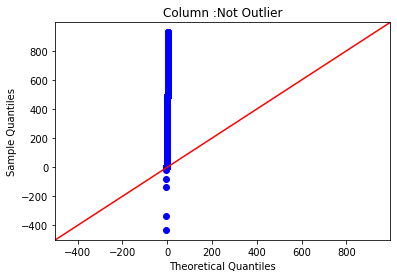

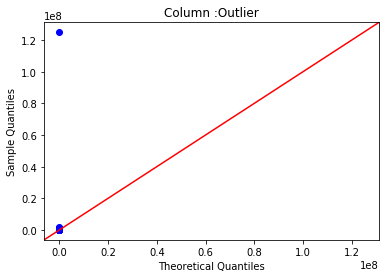

Normality Test (Parametric) :
Column :Not Outlier
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 1581.2450475436272}, 'Shapiro': 0.0, 'K^2': 0.0}
Distribution : Non-Normal Distribution


Column :Outlier
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.09, 'stat': 1107.0932939186405}, 'Shapiro': 0.0, 'K^2': 0.0}
Distribution : Non-Normal Distribution




C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



In [43]:
normal_tes(df,'Out', 'Amount Differences')

In [46]:
# 2. Variance Test
from scipy.stats import levene, bartlett, f_oneway, kruskal
def levene_tes2(data,col,sub):
    print('Levene Tes')
    x=data[col].unique()
    levenetes = ''
    result =  {'Levene-Stat' : levene((data[data[col]==x[0]][sub]),
                                                      (data[data[col]==x[1]][sub]))[0],
                           
                           'P-Value': levene((data[data[col]==x[0]][sub]),
                                                      (data[data[col]==x[1]][sub]))[1]}
    
    print(result)
    if result ['P-Value'] > 0.05:
        levenetes+=('Equal Variance')
    elif result['P-Value'] <= 0.05:
        levenetes+=('Unequal Variance')
    print(levenetes)

In [47]:
levene_tes2(df,'Out','Amount Differences')

Levene Tes
{'Levene-Stat': 8.865593264926972, 'P-Value': 0.0029088915678357635}
Unequal Variance


In [51]:
def mannwhitneyutes (data,col,sub):
    print('Mann Whitney U Test - (Skewed Distribution, Different Variance, Independet Group)')
    x=data[col].unique()
    from scipy.stats import mannwhitneyu
    for i in range (len(x)):
        for j in range (i+1, len(x)):
            print('Mann-Whitney-U Test antara kategory {} dengan kategory {}'.format (x[i], x[j]))
            result = list(mannwhitneyu(data[data[col]==x[i]][sub], 
                                    data[data[col]==x[j]][sub]))
            print('U-Statistic:', result[0])
            print('P-Value:', result[1])

In [52]:
mannwhitneyutes(df,'Out', 'Amount Differences')

Mann Whitney U Test - (Skewed Distribution, Different Variance, Independet Group)
Mann-Whitney-U Test antara kategory Not Outlier dengan kategory Outlier
U-Statistic: 0.0
P-Value: 0.0


## Jawaban Analisa
Dari hasil tes statistik yang dilakukan berdasarkan kategori outlier dan non outlier dari data 'Amount Differences',
dapat disimpulkan bahwa kedua kategori tersebut merupakan kategori yang berbeda. Dari asumsi data yang ada kemungkinan
diterimanya claim non outlier lebih besar dibandingkan outlier, hal ini bisa disebabkan karena claim yang dilakukan oleh outlier bersifat 'mengada-ada' dan hanya 1 dari 2887 data outlier yang diterima claimnya

## Analysis
We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

## Question
Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

In [111]:
df['Claim Type'].value_counts()

Passenger Property Loss    15170
Property Damage             8368
Passenger Theft               77
Employee Loss (MPCECA)        66
Personal Injury               57
Motor Vehicle                  1
Name: Claim Type, dtype: int64

In [110]:
df['Claim Site'].value_counts()

Checked Baggage    20143
Checkpoint          3538
Other                 58
Name: Claim Site, dtype: int64

In [94]:
df['Airline Name'].value_counts()

American Airlines               3475
Delta Air Lines                 3408
UAL                             2700
Southwest Airlines              2484
Continental Airlines            2065
                                ... 
Direct Air                         1
British West Indies Airlines       1
Greyhound Air                      1
Kuwait Airways                     1
Kuwait Airlines                    1
Name: Airline Name, Length: 138, dtype: int64

In [92]:
df['Airport Name'].value_counts()

Los Angeles International Airport       1110
John F. Kennedy International            967
Newark International Airport             905
Chicago O'Hare International Airport     901
Miami International Airport              749
                                        ... 
Bemidji; MN                                1
Williamsport Lycoming Regional             1
Pullman/Moscow Regional                    1
Mid Ohio Valley Regional                   1
Hancock County Bar Harbor                  1
Name: Airport Name, Length: 342, dtype: int64

In [100]:
df.groupby (['Status','Airport Name']).count()

Claim Number  \
Status   Airport Name                                                 
Approved Abilene Regional                                         1   
         Abraham Lincoln Capital Airport; Springfield             2   
         Akron-Canton Regional                                   10   
         Albany International                                    25   
         Albert J Ellis; Jacksonville                             1   
...                                                             ...   
Settled  Williamsport Lycoming Regional                           1   
         Wilmington International                                 4   
         Yakutat                                                  1   
         Yampa Valley Regional                                    2   
         Yeager; Charleston                                       1   

                                                       Date Received  \
Status   Airport Name                                                  
Approved Abilene Regional                                          1   
         Abraham Lincoln Capital Airport; Springfield              2   
         Akron-Canton Regional                                    10   
         Albany International                                     25   
         Albert J Ellis; Jacksonville                              1   
...                                                              ...   
Settled  Williamsport Lycoming Regional                            1   
         Wilmington International                                  4   
         Yakutat                                                   1   
         Yampa Valley Regional                                     2   
         Yeager; Charleston                                        1   

                                                       Incident Date  \
Status   Airport Name                                                  
Approved Abilene Regional                                          1   
         Abraham Lincoln Capital Airport; Springfield              2   
         Akron-Canton Regional                                    10   
         Albany International                                     25   
         Albert J Ellis; Jacksonville                              1   
...                                                              ...   
Settled  Williamsport Lycoming Regional                            1   
         Wilmington International                                  4   
         Yakutat                                                   1   
         Yampa Valley Regional                                     2   
         Yeager; Charleston                                        1   

                                                       Airport Code  \
Status   Airport Name                                                 
Approved Abilene Regional                                         1   
         Abraham Lincoln Capital Airport; Springfield             2   
         Akron-Canton Regional                                   10   
         Albany International                                    25   
         Albert J Ellis; Jacksonville                             1   
...                                                             ...   
Settled  Williamsport Lycoming Regional                           1   
         Wilmington International                                 4   
         Yakutat                                                  1   
         Yampa Valley Regional                                    2   
         Yeager; Charleston                                       1   

                                                       Airline Name  \
Status   Airport Name                                                 
Approved Abilene Regional                                         1   
         Abraham Lincoln Capital Airport; Springfield             2   
         Akron-Canton Regional                   

In [108]:
fig1 = px.histogram(df, x= 'Status', facet_row='Airline Name', facet_col='Airport Name',color='Status',histfunc='sum',title="Status")
fig1.show()

ValueError: 
    Invalid value of type 'builtins.float' received for the 'domain[1]' property of layout.yaxis
        Received value: -0.022536231884057966

    The 'domain[1]' property is a number and may be specified as:
      - An int or float in the interval [0, 1]

## Jawaban Analisa
Secara umum dapat disimpulkan bahwa airport yang memiliki jumlah claim terbanyak merupakan bandara international dimana banyak 
trafik penerbangan yang kompleks dan padat menyebabkan potensi claim dengan mayoritas claim yakni pada tipe Passenger Property Loss 
dan Property Damage